## BASIC USAGE OF XL320 CLASS

In [1]:
import os, time
import numpy as np
import matplotlib.pyplot as plt
import custom_dynamixel_functions as dynamixel
from datetime import datetime
from class_xm430 import xm430
from class_motionhelper import tracker, timer
from class_grp import grp
%matplotlib inline
print ("PACKAGES LOADED.")

PACKAGES LOADED.


## INSTANTIATE XL320 

In [3]:
snapbot = xm430('SNAPBOT', _USB_NUM=0)

[SNAPBOT] INSTANTIATED AT [b'/dev/ttyUSB0']


## CONNECT

In [4]:
snapbot.connect()

# snapbot.IDX_LIST = [21, 22, 15, 16, 13, 14, 17, 18]

[SNAPBOT] CONNECT
[PortHandler setup] The port number 0 has same device name... reinitialize port number 0!!
 SUCCEEDED TO OPEN THE PORT!
 SUCCEEDED TO CHANGE THE BAUDRATE!
 COMM FAIL [b'[TxRxResult] There is no status packet!']
[SNAPBOT] DETECT ID
[SNAPBOT] [0]MOTORS DETECTED 
[SNAPBOT] ID_LIST:[[]]
[SNAPBOT] SYNCREAD FAIL


ValueError: zero-size array to reduction operation minimum which has no identity

In [14]:
snapbot.set_torque([1])
print ("TORQUE ON")

TORQUE ON


In [5]:
# THEN, MOVE
# snapbot.set_goalpos([2800, 2100, 1300, 2100, 1300, 2100, 2800, 2100])

# time.sleep(1)
print (snapbot.get_currpos())
# snapbot.set_goalpos([2800, 2000, 2000, 2200, 1300, 2000, 2000, 2200])
# snapbot.set_goalpos([2800, 2000, 2000, 2000, 1300, 2000, 2000, 2000])
# print snapbot.get_currpos()
print ("INITIALIZE POSITION")

[1476 2599]
INITIALIZE POSITION


## READ CURRENT POSITION

In [11]:
posList = []

In [13]:
currpos = snapbot.get_currpos()
# print ("CURRENT POS: %s" % (currpos))
posList.append(currpos)
print(posList)

[array([2194, 2383, 1967, 2373, 2050, 2369, 1940, 2511]), array([2128, 2065, 2003, 2370, 1402, 2447, 1386, 2402])]


In [60]:
print(posList)

[array([1145, 2380, 1044, 2480, 1068, 2390, 1165, 2429, 1105, 2393, 1084,
       2406]), array([1468, 2261, 1446, 2359, 1450, 2211, 1522, 2227, 1437, 2274, 1412,
       2259]), array([1690, 2136, 1781, 2278, 1684, 2134, 1758, 2129, 1640, 2186, 1611,
       2128]), array([1928, 2130, 1979, 2278, 2082, 2134, 1950, 2130, 1904, 2186, 1844,
       2073]), array([2059, 2048, 2001, 2136, 2082, 2049, 2011, 2057, 2149, 2058, 1843,
       2008])]


## TORQUE OFF

In [6]:
snapbot.set_torque([0])
print ("TORQUE OFF")

TORQUE OFF


## CONTINUOUSLY CHECK MINMAX POS (FOR ONCE)

In [8]:
CHECK_MINMAX_FLAG = False

In [9]:
if CHECK_MINMAX_FLAG:
    curr_pos_min = np.asarray([1000]*snapbot.NID)
    curr_pos_max = np.asarray([0]*snapbot.NID)
    print ("CHECKING MINIMUM AND MAXIMUM")
    while True:
        curr_pos_buff = snapbot.get_currpos()
        if curr_pos_buff.min() != 0: curr_pos = curr_pos_buff
        curr_pos_min = np.minimum(curr_pos_min, curr_pos)
        curr_pos_max = np.maximum(curr_pos_max, curr_pos)
        time.sleep(0.1)

In [10]:
if CHECK_MINMAX_FLAG:
    print ("POS_MIN: %s" % (np.array2string(curr_pos_min, separator=', ')))
    print ("POS_MAX: %s" % (np.array2string(curr_pos_max, separator=', ')))

## SET MINIMUM AND MAXIMUM RANGE

In [11]:
"""
# 1. THIS IS FOR FOUR LEGS WITH THREE JOINTS
POS_MIN: [ 44 272 269  61 280 245  46 267 260  67 285 247]
POS_MAX: [936 743 671 974 750 668 967 753 674 912 741 677]
# 2. FOUR LEGS WITH TWO JOINTS
POS_MIN: [274, 272, 274, 282, 287, 275, 273, 267]
POS_MAX: [765, 671, 737, 666, 736, 671, 743, 668]
"""
min_pos = np.asarray([274])
max_pos = np.asarray([765])
snapbot.set_minmaxpos(min_pos, max_pos)
print ("WORKING RANGE OF SNAPBOT CONFIGURED.")
print ("MIN_POS:[%s]" % (snapbot.min_pos))
print ("MAX_POS:[%s]" % (snapbot.max_pos))

WORKING RANGE OF SNAPBOT CONFIGURED.
MIN_POS:[[274 272 274 282 287 275 273 267]]
MAX_POS:[[765 671 737 666 736 671 743 668]]


## CHECK MOTION ID WITH LED

In [12]:
ID = 6 # THIS CAN VARY FROM 0 ~ NID-1

# FIRST, INITIALIZE POSITION
snapbot.set_goalpos([512]*snapbot.NID)
# AND, THEN, SHOW LED!
temp = [0]*snapbot.NID
print ("CURRENT ID IS [%d]" % (snapbot.IDX_LIST[ID]))
for i in reversed(range(1, 8)):
    temp[ID] = i
    snapbot.set_led(LED_VAL=temp)
    time.sleep(0.2)

IndexError: list index out of range

In [13]:
# TURN LED OFF
snapbot.set_led(LED_VAL=[0])

## CHECK ANGLE LIMIT

In [6]:
print (snapbot.get_anglelimit())

[array([4908, 5164]), array([25603, 25603])]


## TORQUE OFF

In [1]:
snapbot.set_torque([0])
print ("TORQUE OFF")

NameError: name 'snapbot' is not defined

## TORQUE ON

In [9]:
snapbot.set_torque([1])
print ("TORQUE ON")

TORQUE ON


## SET DELAYED TIME

In [10]:
snapbot.set_delaytime([20])
print ("DELAYED TIME CONFIGURED")

DELAYED TIME CONFIGURED


## SET PID GAINS (32, 0, 0)

In [11]:
snapbot.set_pidgains(32, 0, 0)
print ("PID GAINS CONFIGURED")

PID GAINS CONFIGURED


## SET MAXIMUM TORQUE (~1023)

In [12]:
snapbot.set_maxtorque([1000])
print ("MAX TORQUE CONFIGURED")

MAX TORQUE CONFIGURED


## SET MAXIMUM SPEED (~2047)

In [42]:
# FIRST, SET SPEED
snapbot.set_goalspeed([400])
print ("GOAL SPEED CONFIGURED")

GOAL SPEED CONFIGURED


## INITIALIZE POSITION

In [13]:
# THEN, MOVE
snapbot.set_goalpos([2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048])
# time.sleep(1)
# print snapbot.get_currpos()
# snapbot.set_goalpos([512])
# print snapbot.get_currpos()
print ("INITIALIZE POSITION")

INITIALIZE POSITION


## USE GRP FOR SMOOTH PLANNING

In [8]:
# INITIALIZE TRAJECTORIES
posconcat = np.zeros((1, snapbot.NID))
snapbot.set_torque([0])
print ("\nTrajectory is:\n")
print np.array2string(posconcat, separator=', ')
print ("\nSHAPE IS [%s]" % (posconcat.shape,))


Trajectory is:

[[0., 0.]]

SHAPE IS [(1, 2)]


### ADD CURRENT POSITION

In [13]:
currpos = snapbot.get_currpos()
if posconcat.sum() == 0:
    posconcat = currpos.reshape((1, -1))
else:
    posconcat = np.append(posconcat, currpos.reshape((1, -1)), axis=0)
print ("\nTrajectory is:\n")
print np.array2string(posconcat, separator=', ')
print ("\nSHAPE IS [%s]" % (posconcat.shape,))


Trajectory is:

[[1549, 2113],
 [1946, 2113],
 [2283, 2113],
 [2046, 2113],
 [1669, 2113]]

SHAPE IS [(5, 2)]


### REMOVE LATEST POSITION

In [ ]:
n = posconcat.shape[0]
posconcat = np.delete(posconcat, [n-1], axis=0)
print ("\nTrajectory is:\n")
print np.array2string(posconcat, separator=', ')
print ("\nSHAPE IS [%s]" % (posconcat.shape,))

## USE SAVED POS

In [4]:
USE_SAVED = True
if USE_SAVED:
    posconcat = np.array(
        [[1100, 2400, 1100, 2400, 1100, 2400, 1100, 2400, 1100, 2400, 1100, 2400],
        # [1400, 2200, 1400, 2200, 1400, 2200, 1400, 2200, 1400, 2200, 1400, 2200],
        # [1700, 2100, 1700, 2100, 1700, 2100, 1700, 2100, 1700, 2100, 1700, 2100],
        # [1900, 2050, 1900, 2050, 1900, 2050, 1900, 2050, 1900, 2050, 1900, 2050],
        [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]]
        #    [[512, 516, 511, 512, 511, 511, 513, 514],
        #    [508, 469, 511, 445, 511, 511, 512, 512],
        #    [620, 472, 395, 445, 390, 511, 586, 514],
        #    [629, 533, 418, 515, 390, 512, 585, 514],
        #    [631, 533, 418, 514, 393, 476, 586, 473],
        #    [424, 533, 612, 522, 619, 476, 458, 473],
        #    [424, 533, 612, 521, 619, 525, 457, 532],
        #    [515, 533, 506, 522, 541, 525, 517, 528]]
    )

# print ("GAUSSIAN RANDOM PATH!")
# npz_name = 'rollout/rollout_step002@2017_10_26_11_33_52.npz' # 32 CM !!
# l = np.load(npz_name)
# posconcat = l['samplepath']*4

GAUSSIAN RANDOM PATH

[[1100 2400 1100 2400 1100 2400 1100 2400 1100 2400 1100 2400]
 [2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000]
 [1100 2400 1100 2400 1100 2400 1100 2400 1100 2400 1100 2400]]
[GRP] GAUSSIAN RANDOM PATH
[GRP] THE LENGTH OF A INTERPOLATED TRAJ IS [96]


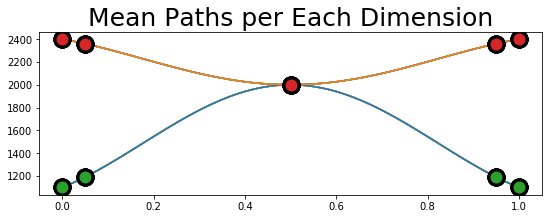

In [5]:

posconcat_cont = np.copy(posconcat)
posconcat_cont = np.append(posconcat_cont, posconcat[0, :].reshape((1, -1)), axis=0)
posconcat_cont = posconcat_cont
print(posconcat_cont)
g = grp("GRP")
g.set_data(posconcat_cont,_hyp_mean={'gain':1, 'len':1, 'noise':1e-6},
            _hyp_var={'gain':100.**2, 'len':100.**2, 'noise':1e-2},
            _DO_EPSRU=True, _teps=0.05)
g.compute_grp(_vel=50)

# PLOT MEAN PATH (PER DIMENSION)
plt.figure(figsize=(9, 3))
for i in range(g.dim):
    plt.plot(g.tz, g.muz[:, i])
for i in range(g.dim):
    plt.plot(g.tx_used, g.px_used[:,i], 
             marker='o', ms=15, mew=3, mec='k',
             ls = 'none', lw=3)
plt.title("Mean Paths per Each Dimension", fontsize=25)
plt.show()

In [6]:
pos = g.muz[:, :].astype(np.int).tolist()
print(np.array(pos))

[[1099 2400 1099 ... 2400 1099 2400]
 [1116 2392 1116 ... 2392 1116 2392]
 [1135 2384 1135 ... 2384 1135 2384]
 ...
 [1135 2384 1135 ... 2384 1135 2384]
 [1116 2392 1116 ... 2392 1116 2392]
 [1099 2400 1099 ... 2400 1099 2400]]


# Warn: It is very dangerous test

In [83]:
p1 = [1100, 2400, 1100, 2400, 1100, 2400, 1100, 2400, 1100, 2400, 1100, 2400]
p2 = [2900, 2000, 2900, 2000, 2900, 2000, 2900, 2000, 2900, 2000, 2900, 2000]
poses = []
hard_test = True

if (hard_test):
    for i in range(48):
        poses.append(p1)
    

    for i in range(48):
        poses.append(p1)

print(np.array(poses).shape)

(96, 12)


In [14]:
poses = np.load('./qpos.npy')
poses.T[1] = -poses.T[1]
poses.T[3] = -poses.T[3]
poses.T[5] = -poses.T[5]
poses.T[7] = -poses.T[7]
poses = 2048/180*poses+2048
# poses.T[]

In [15]:
def get_snapbot():
    snapbot = xl320('SNAPBOT', _USB_NUM=0)
    snapbot.connect()
    # min_pos = np.asarray([274, 272, 274, 282, 287, 275, 273, 267]*4)
    # max_pos = np.asarray([765, 671, 737, 666, 736, 671, 743, 668]*4)
    # snapbot.set_minmaxpos(min_pos, max_pos)
    snapbot.IDX_LIST = [21, 22, 15, 16, 13, 14, 17, 18]
    snapbot.set_delaytime([30])
    snapbot.set_pidgains(20, 0, 0)
    snapbot.set_maxtorque([2000])
    snapbot.set_goalspeed([1500])
    snapbot.set_torque([1])
    # snapbot.set_goalpos([512]*4)
    return snapbot
snapbot = get_snapbot()

# MAKE THE SNAPBOT FOLLOW
# pos = poses[0]#g.muz[0, :].astype(np.int).tolist()
# snapbot.set_goalpos(pos)
time.sleep(1)

idx, loop_cnt, plot, flag, threshold = 0, 0, [], False, 0
t = timer(_HZ=20, _MAX_SEC=1000)
t.start()
x=[]
startT = time.time()
while t.is_notfinished():
    if t.do_run():
        pos = poses[idx]#g.muz[idx, :].astype(np.int).tolist()
        if not flag:
            flag = True
            # startT = time.time()
            threshold = pos
            # print('a', idx)
        # currpos = snapbot.get_currpos(); time.sleep(0.001)
        # currcurr = snapbot.get_currcurr(); time.sleep(0.001)
        # if flag and abs(currpos[0] - threshold[0]) < 20:
            # print(startT - time.time())
            # startT = time.time()
            # flag = False
            # print('b', idx)
        # print(currpos[0])
        idx = idx + 1
        # plot.append([pos[0], currpos[0]])
        # plot.append(currcurr)
        # x.append(time.time() - startT)
        snapbot.set_goalpos((np.array(pos, dtype=np.int).tolist())); time.sleep(0.001)
        # if idx >= g.nz:
        #     idx = 0
        #     loop_cnt = loop_cnt + 1
        #     time.sleep(0.01)
        if loop_cnt >= 4:
            t.finish()

plt.plot(x, plot)
print ("FINISHED.")

[SNAPBOT] INSTANTIATED AT [/dev/ttyUSB0]
[SNAPBOT] CONNECT
 SUCCEEDED TO OPEN THE PORT!
 SUCCEEDED TO CHANGE THE BAUDRATE!
COMMUNICATION SUCCESS
[SNAPBOT] DETECT ID
[SNAPBOT] [8]MOTORS DETECTED 
[SNAPBOT] ID_LIST:[[13, 14, 15, 16, 17, 18, 21, 22]]
TIMER WITH [20]HZ INITIALIZED. MAX_SEC IS [1000.0sec].


# PURSUIT

[SNAPBOT] INSTANTIATED AT [/dev/ttyUSB0]
[SNAPBOT] CONNECT
 SUCCEEDED TO OPEN THE PORT!
 SUCCEEDED TO CHANGE THE BAUDRATE!
COMMUNICATION SUCCESS
[SNAPBOT] DETECT ID
[SNAPBOT] [2]MOTORS DETECTED 
[SNAPBOT] ID_LIST:[[19, 20]]
TIMER WITH [50]HZ INITIALIZED. MAX_SEC IS [1000.0sec].
FINISHED.


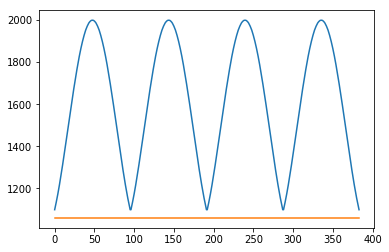

In [38]:
def get_snapbot():
    snapbot = xl320('SNAPBOT', _USB_NUM=0)
    snapbot.connect()
    min_pos = np.asarray([274, 272, 274, 282, 287, 275, 273, 267])
    max_pos = np.asarray([765, 671, 737, 666, 736, 671, 743, 668])
    snapbot.set_minmaxpos(min_pos, max_pos)
    snapbot.set_delaytime([30])
    snapbot.set_pidgains(20, 0, 0)
    snapbot.set_maxtorque([1000])
    snapbot.set_goalspeed([500])
    snapbot.set_torque([1])
    # snapbot.set_goalpos([2200, 2000, 2200, 2000, 2200, 2000, 2200, 2000])
    return snapbot
snapbot = get_snapbot()

# MAKE THE SNAPBOT FOLLOW
pos = g.muz[0, :].astype(np.int).tolist()
snapbot.set_goalpos(pos)
time.sleep(1)

idx, loop_cnt, plot, flag, threshold = 0, 0, [], False, 0
t = timer(_HZ=50, _MAX_SEC=1000)
t.start()
while t.is_notfinished():
    if t.do_run():
        pos = g.muz[idx, :].astype(np.int).tolist()
        if not flag:
            flag = True
            startT = time.time()
            threshold = pos
            # print('a', idx)
        currpos = snapbot.get_currpos(); time.sleep(0.001)
        if flag and abs(currpos[0] - threshold[0]) < 20:
            print(startT - time.time())
            startT = time.time()
            flag = False
            # print('b', idx)
        # print(currpos[0])
        idx = idx + 1
        plot.append([pos[0], currpos[0]])
        snapbot.set_goalpos(pos); time.sleep(0.001)
        if idx >= g.nz:
            idx = 0
            loop_cnt = loop_cnt + 1
            time.sleep(0.01)
        if loop_cnt >= 4:
            t.finish()

plt.plot(plot)
print ("FINISHED.")

In [ ]:
np.mod(190, 180)

## DISCONNECT

In [31]:
snapbot.close()

[SNAPBOT] CLOSE


## [!!CAUTION!!] CONFIGURATION (CHANGE ID)

In [ ]:
# BY DEFAULT, MAKE IT FALSE
DO_YOU_REALLY_WANT_TO_DO_THIS = True

if DO_YOU_REALLY_WANT_TO_DO_THIS:
    import custom_dynamixel_functions as dynamixel
    
    # FROM AND TO DEVICE INDEX
    DXL_ID              = int(14)
    DXL_ID_TO           = int(22)
    
    # CONFIGURATION
    DEVICENAME = "/dev/ttyUSB0".encode('utf-8')
    BAUDRATE            = 1000000 
    PROTOCOL_VERSION    = 2
    ADDR_MX_ID          = 3
    COMM_SUCCESS        = 0  
    
    # CHANGE THE BAUDRATE
    port_num = dynamixel.portHandler(DEVICENAME)
    dynamixel.packetHandler()
    if dynamixel.openPort(port_num):
        print("Succeeded to open the port!")
    else:
        print("Failed to open the port!")
    if dynamixel.setBaudRate(port_num, BAUDRATE):
        print("Succeeded to change the baudrate!")
    else:
        print("Failed to change the baudrate!")
        
    # CHANGE TO ID
    dynamixel.write1ByteTxRx(port_num, PROTOCOL_VERSION, DXL_ID, ADDR_MX_ID, DXL_ID_TO)
    if dynamixel.getLastTxRxResult(port_num, PROTOCOL_VERSION) != COMM_SUCCESS:
        print('printTXRXResult')
        # dynamixel.printTxRxResult(PROTOCOL_VERSION, dynamixel.getLastTxRxResult(port_num, PROTOCOL_VERSION))
    elif dynamixel.getLastRxPacketError(port_num, PROTOCOL_VERSION) != 0:
        print('printRxPacketError')
        # dynamixel.printRxPacketError(PROTOCOL_VERSION, dynamixel.getLastRxPacketError(port_num, PROTOCOL_VERSION))
    else:
        print ("SUCCESS! [%d] TO [%d]" % (DXL_ID, DXL_ID_TO))